In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(display="diagram")

In [13]:
data = sns.load_dataset('mpg')
data = data.dropna()

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
data = data.drop(['name', 'origin'], axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [65]:
X = data[['horsepower']]
y = data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
train_mses = []
test_mses = []

for k in range(1,21):
    pipe = Pipeline([
        ('polyfeatures', PolynomialFeatures(degree=k, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

The Complexity that minimized Test Error was: 10


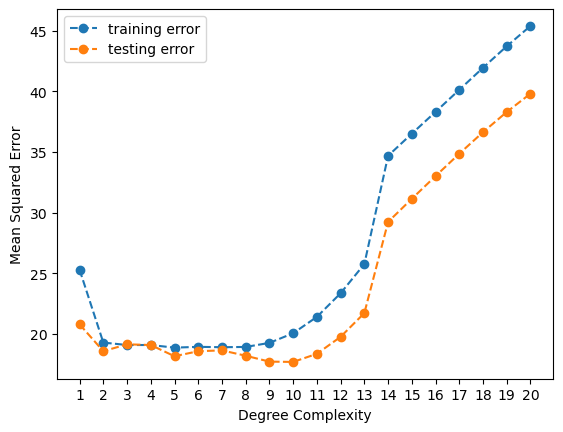

In [91]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();